<a href="https://colab.research.google.com/github/iamafifaah/Google-Colab/blob/main/random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install geopandas

In [ ]:
pip install rasterio

In [ ]:
from osgeo import gdal
import os
import glob
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import show
import rasterio.mask
import numpy as np
import geopandas as gpd

In [ ]:
flood = r'/content/data/Flood_Point_Fix.shp'

In [ ]:
nonflood = r'/content/data/Non_Flood.shp'

In [ ]:
sampling = r'/content/data/Sampling.shp'

In [ ]:
batas = r'/content/data/Batas.shp'

In [ ]:
flood = gpd.read_file(flood)

In [ ]:
nonflood = gpd.read_file(nonflood)

In [ ]:
sampling = gpd.read_file(sampling)

In [ ]:
batas = gpd.read_file(batas)

In [ ]:
flood.head()

,ID,Kecamatan,land_cover,rainfall,elevation,slope,TWI,disschanne,dissriver,MNDWI,NDBI,NDWI,nightlight,popdensity,sexratio,Class,X,Y,geometry
0,1,Mampang Prapatan,4,4139.84,19.436800,5.93226,3.84336,1382.930,1261.780,-0.292838,0.085813,-0.028947,56.79,113147,99.61,1,701369.510,9312695.831,POINT (701369.51 9312695.831)
1,2,Tanah Abang,4,4141.11,0.135218,2.87524,5.03541,403.609,402.492,-0.286593,0.110816,-0.093184,39.97,165179,101.00,1,700081.126,9314170.987,POINT (700081.126 9314170.987)
2,3,Tanah Abang,5,4140.06,8.109330,1.76050,5.04900,966.075,1086.650,-0.475638,-0.069557,0.085849,46.67,165179,101.00,1,700121.837,9313451.405,POINT (700121.837 9313451.405)
3,4,Tanah Abang,5,4139.57,8.602600,1.61033,4.94122,939.149,1056.830,-0.475638,-0.069557,0.085849,46.67,165179,101.00,1,700129.401,9313462.440,POINT (700129.401 9313462.44)
4,5,Tanah Abang,4,4125.00,7.854300,4.91466,5.30018,150.000,256.320,-0.425449,0.177009,-0.172949,42.91,165179,101.00,1,700335.004,9314291.779,POINT (700335.004 9314291.779)


In [ ]:
nonflood.head()

,land_cover,rainfall,elevation,slope,TWI,disschanne,dissriver,MNDWI,NDBI,NDWI,nightlight,popdensity,sexratio,Class,ID,X,Y,geometry
0,2,4703.15,45.185300,4.74227,4.28887,10214.30,483.735,-0.615139,-0.093642,0.140915,15.22,306965,100.78,0,155,712000.635,9300749.635,POINT (712000.635 9300749.635)
1,4,3364.10,3.212160,6.37838,4.42702,6100.26,3276.740,-0.296344,0.147171,-0.116848,38.90,297992,99.24,0,156,709231.316,9317271.320,POINT (709231.316 9317271.32)
2,4,3531.32,0.960572,1.60768,5.98945,3013.47,900.000,-0.152857,-0.151391,0.138127,24.30,590097,102.28,0,157,694590.894,9320231.401,POINT (694590.894 9320231.401)
3,4,5026.79,42.394700,5.20998,4.21048,11951.80,150.000,-0.426667,0.202247,-0.158583,27.36,220968,96.67,0,158,698048.196,9302611.756,POINT (698048.196 9302611.756)
4,4,4313.01,24.350500,6.84469,3.92232,5274.03,240.000,-0.349392,0.154690,-0.140669,41.10,332035,100.00,0,159,697235.817,9310193.609,POINT (697235.817 9310193.609)


In [ ]:
sampling.head()

,ID,land_cover,rainfall,elevation,slope,TWI,disschanne,dissriver,MNDWI,NDBI,NDWI,nightlight,popdensity,sexratio,Class,X,Y,layer,geometry
0,1,4,4139.84,19.436800,5.93226,3.84336,1382.930,1261.780,-0.292838,0.085813,-0.028947,56.79,113147,99.61,1,701369.510,9312695.831,Flood,POINT (701369.51 9312695.831)
1,2,4,4141.11,0.135218,2.87524,5.03541,403.609,402.492,-0.286593,0.110816,-0.093184,39.97,165179,101.00,1,700081.126,9314170.987,Flood,POINT (700081.126 9314170.987)
2,3,5,4140.06,8.109330,1.76050,5.04900,966.075,1086.650,-0.475638,-0.069557,0.085849,46.67,165179,101.00,1,700121.837,9313451.405,Flood,POINT (700121.837 9313451.405)
3,4,5,4139.57,8.602600,1.61033,4.94122,939.149,1056.830,-0.475638,-0.069557,0.085849,46.67,165179,101.00,1,700129.401,9313462.440,Flood,POINT (700129.401 9313462.44)
4,5,4,4125.00,7.854300,4.91466,5.30018,150.000,256.320,-0.425449,0.177009,-0.172949,42.91,165179,101.00,1,700335.004,9314291.779,Flood,POINT (700335.004 9314291.779)


In [ ]:
flood.crs

<Projected CRS: EPSG:32748>
Name: WGS 84 / UTM zone 48S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 102°E and 108°E, southern hemisphere between 80°S and equator, onshore and offshore. Indonesia.
- bounds: (102.0, -80.0, 108.0, 0.0)
Coordinate Operation:
- name: UTM zone 48S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
nonflood.crs

<Projected CRS: EPSG:32748>
Name: WGS 84 / UTM zone 48S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 102°E and 108°E, southern hemisphere between 80°S and equator, onshore and offshore. Indonesia.
- bounds: (102.0, -80.0, 108.0, 0.0)
Coordinate Operation:
- name: UTM zone 48S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
sampling.crs

<Projected CRS: EPSG:32748>
Name: WGS 84 / UTM zone 48S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 102°E and 108°E, southern hemisphere between 80°S and equator, onshore and offshore. Indonesia.
- bounds: (102.0, -80.0, 108.0, 0.0)
Coordinate Operation:
- name: UTM zone 48S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
batas.crs

<Projected CRS: EPSG:32748>
Name: WGS 84 / UTM zone 48S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 102°E and 108°E, southern hemisphere between 80°S and equator, onshore and offshore. Indonesia.
- bounds: (102.0, -80.0, 108.0, 0.0)
Coordinate Operation:
- name: UTM zone 48S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

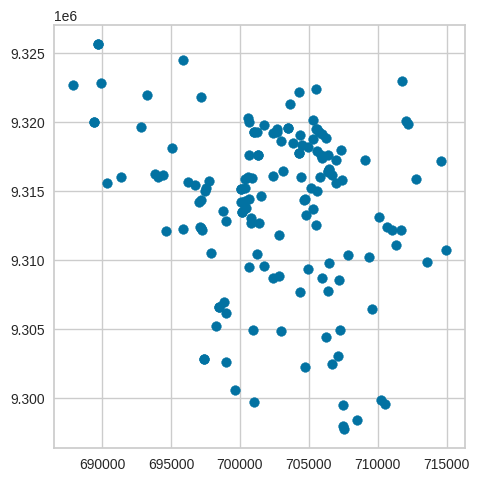

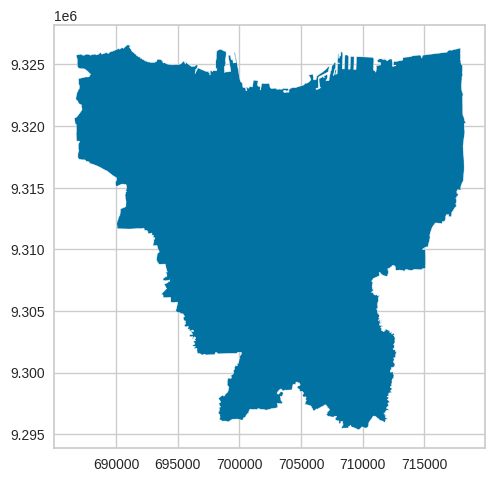

In [ ]:
flood.plot()
batas.plot()

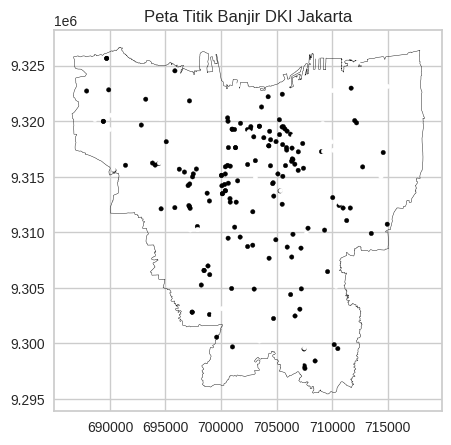

In [ ]:
fig, ax = plt.subplots(figsize=(5, 7))

# Plotkan batas wilayah ke axes
batas.plot(ax=ax, edgecolor='black', facecolor='none')

# Plotkan titik banjir ke axes yang sama
sampling.plot(column = 'Class', ax=ax, markersize=10)

# Tambahan: memberikan judul dan tampilkan
plt.title("Peta Titik Banjir DKI Jakarta")
plt.show()

In [ ]:
kota = r'/content/data/Kota.shp'

In [ ]:
kota = gpd.read_file(kota)

In [ ]:
kota.head()

,OBJECTID,GID_0,NAME_0,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,NL_NAME_2,GID_3,NAME_3,VARNAME_3,NL_NAME_3,TYPE_3,ENGTYPE_3,CC_3,HASC_3,Shape_Leng,Shape_Area,geometry
0,1,IDN,Indonesia,IDN.7_1,Jakarta Raya,None,IDN.7.1_1,Jakarta Barat,None,IDN.7.1.1_1,Cengkareng,None,None,Kecamatan,Sub-district,3174070,None,31193.629963,2.623779e+07,"POLYGON ((688151.367 9316917.839, 688158.156 9..."
1,2,IDN,Indonesia,IDN.7_1,Jakarta Raya,None,IDN.7.1_1,Jakarta Barat,None,IDN.7.1.2_1,Grogolpetamburan,None,None,Kecamatan,Sub-district,3174040,None,14181.380194,1.082747e+07,"POLYGON ((697322.416 9315982.077, 697309.738 9..."
2,3,IDN,Indonesia,IDN.7_1,Jakarta Raya,None,IDN.7.1_1,Jakarta Barat,None,IDN.7.1.3_1,Kalideres,None,None,Kecamatan,Sub-district,3174080,None,29234.253123,2.846948e+07,"POLYGON ((688151.367 9316917.839, 688131.109 9..."
3,4,IDN,Indonesia,IDN.7_1,Jakarta Raya,None,IDN.7.1_1,Jakarta Barat,None,IDN.7.1.4_1,Kebonjeruk,None,None,Kecamatan,Sub-district,3174020,None,22793.871309,1.715234e+07,"POLYGON ((696624.443 9312572.887, 696622.724 9..."
4,5,IDN,Indonesia,IDN.7_1,Jakarta Raya,None,IDN.7.1_1,Jakarta Barat,None,IDN.7.1.5_1,Kembangan,None,None,Kecamatan,Sub-district,3174010,None,31403.047443,2.519941e+07,"POLYGON ((694765.439 9311926.177, 694754.388 9..."


In [ ]:
kota.crs

<Projected CRS: EPSG:32748>
Name: WGS 84 / UTM zone 48S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 102°E and 108°E, southern hemisphere between 80°S and equator, onshore and offshore. Indonesia.
- bounds: (102.0, -80.0, 108.0, 0.0)
Coordinate Operation:
- name: UTM zone 48S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
sampling.head()

,ID,land_cover,rainfall,elevation,slope,TWI,disschanne,dissriver,MNDWI,NDBI,NDWI,nightlight,popdensity,sexratio,Class,X,Y,layer,geometry
0,1,4,4139.84,19.436800,5.93226,3.84336,1382.930,1261.780,-0.292838,0.085813,-0.028947,56.79,113147,99.61,1,701369.510,9312695.831,Flood,POINT (701369.51 9312695.831)
1,2,4,4141.11,0.135218,2.87524,5.03541,403.609,402.492,-0.286593,0.110816,-0.093184,39.97,165179,101.00,1,700081.126,9314170.987,Flood,POINT (700081.126 9314170.987)
2,3,5,4140.06,8.109330,1.76050,5.04900,966.075,1086.650,-0.475638,-0.069557,0.085849,46.67,165179,101.00,1,700121.837,9313451.405,Flood,POINT (700121.837 9313451.405)
3,4,5,4139.57,8.602600,1.61033,4.94122,939.149,1056.830,-0.475638,-0.069557,0.085849,46.67,165179,101.00,1,700129.401,9313462.440,Flood,POINT (700129.401 9313462.44)
4,5,4,4125.00,7.854300,4.91466,5.30018,150.000,256.320,-0.425449,0.177009,-0.172949,42.91,165179,101.00,1,700335.004,9314291.779,Flood,POINT (700335.004 9314291.779)


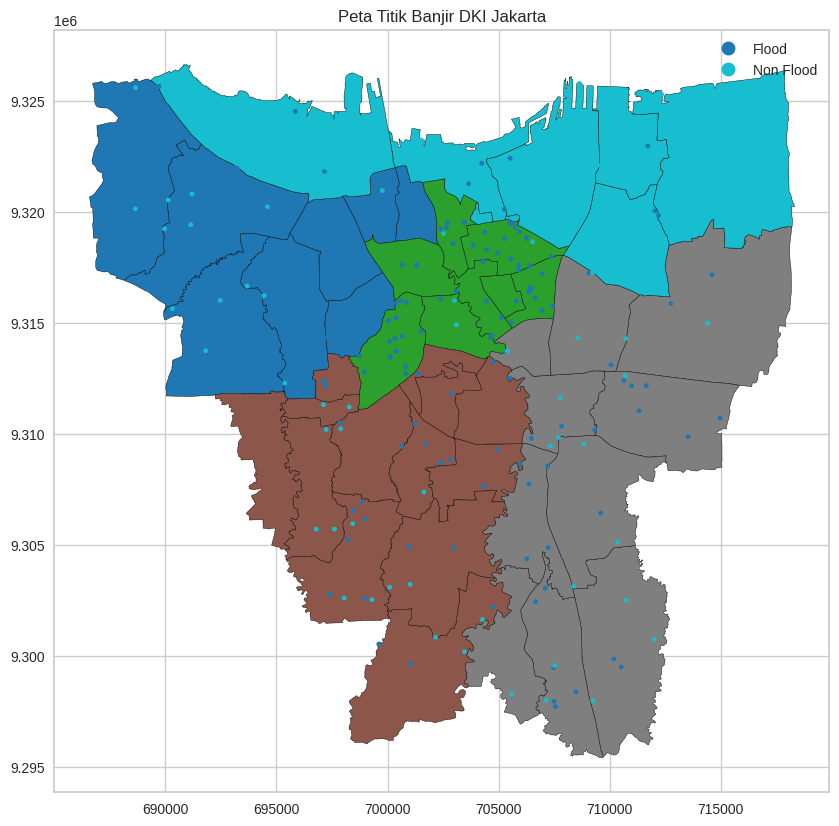

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

# Plotkan batas wilayah ke axes
kota.plot(column = 'NAME_2', ax=ax, edgecolor='black', legend = True)

# Plotkan titik banjir ke axes yang sama
sampling.plot(column = 'layer', ax=ax, markersize=10, legend = True)

# Tambahan: memberikan judul dan tampilkan
plt.title("Peta Titik Banjir DKI Jakarta")
plt.show()

# SAVE FILE TO SPECIFIC DIR

In [ ]:
flood.to_file("/content/output/flood.shp")

In [ ]:
nonflood.to_file("/content/output/nonflood.shp")

In [ ]:
sampling.to_file("/content/output/sampling.shp")

In [ ]:
flood.to_csv("/content/output/flood.csv")

In [ ]:
nonflood.to_csv("/content/output/nonflood.csv")

In [ ]:
sampling.to_csv("/content/output/sampling.csv")

# Mulai read file csv

In [ ]:
import pandas as pd

In [ ]:
sampling = pd.read_csv("/content/output/sampling.csv")

In [ ]:
flood = pd.read_csv("/content/output/flood.csv")

In [ ]:
nonflood = pd.read_csv("/content/output/nonflood.csv")

In [ ]:
sampling.head()

,Unnamed: 0,ID,land_cover,rainfall,elevation,slope,TWI,disschanne,dissriver,MNDWI,NDBI,NDWI,nightlight,popdensity,sexratio,Class,X,Y,layer,geometry
0,0,1,4,4139.84,19.436800,5.93226,3.84336,1382.930,1261.780,-0.292838,0.085813,-0.028947,56.79,113147,99.61,1,701369.510,9312695.831,Flood,POINT (701369.51 9312695.831)
1,1,2,4,4141.11,0.135218,2.87524,5.03541,403.609,402.492,-0.286593,0.110816,-0.093184,39.97,165179,101.00,1,700081.126,9314170.987,Flood,POINT (700081.126 9314170.987)
2,2,3,5,4140.06,8.109330,1.76050,5.04900,966.075,1086.650,-0.475638,-0.069557,0.085849,46.67,165179,101.00,1,700121.837,9313451.405,Flood,POINT (700121.837 9313451.405)
3,3,4,5,4139.57,8.602600,1.61033,4.94122,939.149,1056.830,-0.475638,-0.069557,0.085849,46.67,165179,101.00,1,700129.401,9313462.440,Flood,POINT (700129.401 9313462.44)
4,4,5,4,4125.00,7.854300,4.91466,5.30018,150.000,256.320,-0.425449,0.177009,-0.172949,42.91,165179,101.00,1,700335.004,9314291.779,Flood,POINT (700335.004 9314291.779)


## Membuat korelasi dan bobot sebelum machine learning

In [ ]:
sampling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  218 non-null    int64  
 1   ID          218 non-null    int64  
 2   land_cover  218 non-null    int64  
 3   rainfall    218 non-null    float64
 4   elevation   218 non-null    float64
 5   slope       218 non-null    float64
 6   TWI         218 non-null    float64
 7   disschanne  218 non-null    float64
 8   dissriver   218 non-null    float64
 9   MNDWI       218 non-null    float64
 10  NDBI        218 non-null    float64
 11  NDWI        218 non-null    float64
 12  nightlight  218 non-null    float64
 13  popdensity  218 non-null    int64  
 14  sexratio    218 non-null    float64
 15  Class       218 non-null    int64  
 16  X           218 non-null    float64
 17  Y           218 non-null    float64
 18  layer       218 non-null    object 
 19  geometry    218 non-null    o

In [ ]:
sampling = sampling.drop(['Unnamed: 0', 'ID', 'geometry', 'layer', 'Y', 'X'], axis= 1)

In [ ]:
sampling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   land_cover  218 non-null    int64  
 1   rainfall    218 non-null    float64
 2   elevation   218 non-null    float64
 3   slope       218 non-null    float64
 4   TWI         218 non-null    float64
 5   disschanne  218 non-null    float64
 6   dissriver   218 non-null    float64
 7   MNDWI       218 non-null    float64
 8   NDBI        218 non-null    float64
 9   NDWI        218 non-null    float64
 10  nightlight  218 non-null    float64
 11  popdensity  218 non-null    int64  
 12  sexratio    218 non-null    float64
 13  Class       218 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 24.0 KB


In [ ]:
x = sampling.drop('Class', axis=1)

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   land_cover  218 non-null    int64  
 1   rainfall    218 non-null    float64
 2   elevation   218 non-null    float64
 3   slope       218 non-null    float64
 4   TWI         218 non-null    float64
 5   disschanne  218 non-null    float64
 6   dissriver   218 non-null    float64
 7   MNDWI       218 non-null    float64
 8   NDBI        218 non-null    float64
 9   NDWI        218 non-null    float64
 10  nightlight  218 non-null    float64
 11  popdensity  218 non-null    int64  
 12  sexratio    218 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 22.3 KB


In [ ]:
y = sampling['Class']

In [ ]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 218 entries, 0 to 217
Series name: Class
Non-Null Count  Dtype
--------------  -----
218 non-null    int64
dtypes: int64(1)
memory usage: 1.8 KB


In [ ]:
#### Basic Important Modules ####
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12, 8)
import seaborn as sns
sns.set(style='whitegrid', color_codes=True)
import warnings
warnings.filterwarnings('ignore')

In [ ]:
def count_categories(feature):
  # print(df[feature].value_counts())
  plt.figure(figsize=(2, 2))
  sns.countplot(
      x=feature,
      data=sampling,
  );

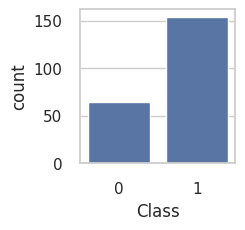

In [ ]:
count_categories('Class')

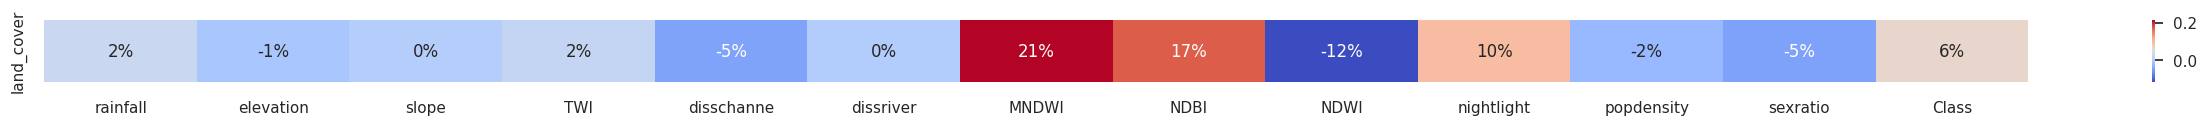

In [ ]:
# Numerical Input - Categorical Output
# Kendall's Method
plt.figure(figsize=(32, .8))
sns.heatmap(
    data=sampling.corr('kendall').iloc[:1, 1:],
    annot=True,
    fmt='.0%',
    cmap='coolwarm'
);

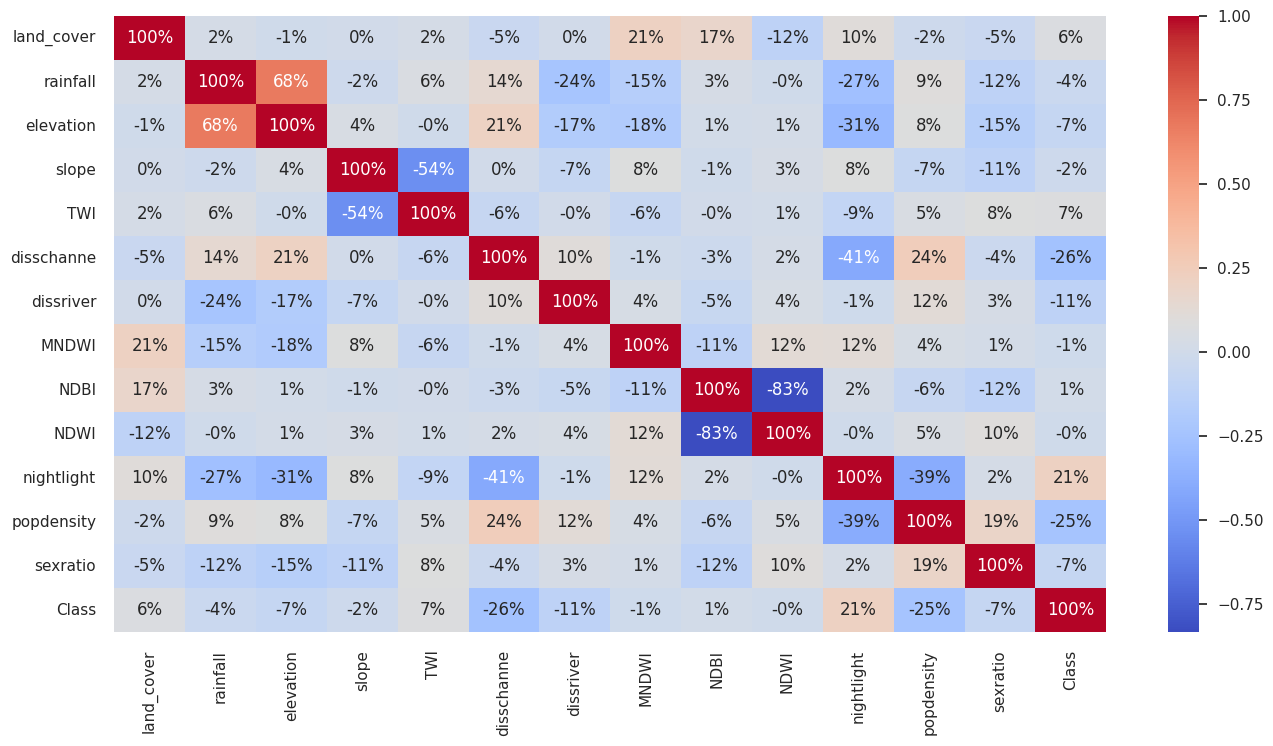

In [ ]:
# Numerical Input - Categorical Output
# Kendall's Method
plt.figure(figsize=(16, 8))
sns.heatmap(
    data=sampling.corr('kendall'),
    annot=True,
    fmt='.0%',
    cmap='coolwarm'
);

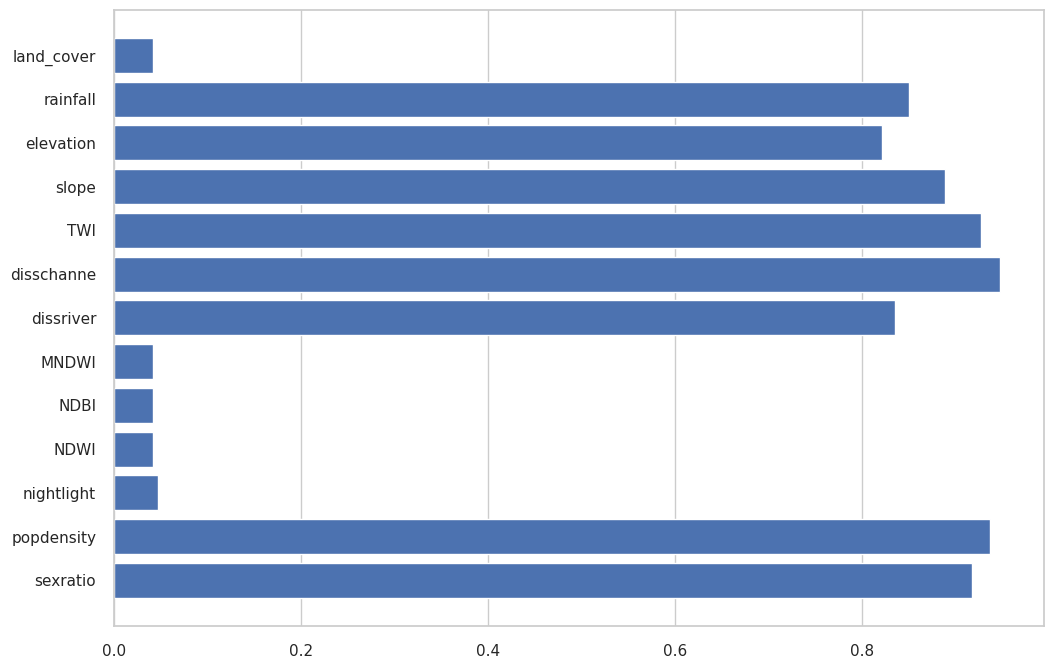

In [ ]:
from yellowbrick.features import Rank1D

# Instantiate the 1D visualizer with the Sharpiro ranking algorithm
visualizer = Rank1D(algorithm='shapiro', features= x.columns)
visualizer.fit(x, y)           # Fit the data to the visualizer
visualizer.transform(x.values);        # Transform the data
# visualizer.show()              # Finalize and render the figure

In [ ]:
from scipy.stats import shapiro
# normality test
def normality_test_shapiro(feature):
  stat, p = shapiro(x[feature].values)
  print('Statistics=%.3f, p=%.3f' % (stat, p))
  # interpret
  alpha = 0.05
  if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
  else:
    print('Sample does not look Gaussian (reject H0)')

In [ ]:
for feature in x.columns:
  normality_test_shapiro(feature)

Statistics=0.042, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.850, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.822, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.889, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.927, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.948, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.836, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.041, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.041, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.041, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.047, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.938, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.918, p=0.000
Sample does not look Gaussian (reject H0)


In [ ]:
from scipy.stats import normaltest
def normality_test_agostino(feature):
  # normality test
  stat, p = normaltest(x[feature].values)
  print('Statistics=%.3f, p=%.3f' % (stat, p))
  # interpret
  alpha = 0.05
  if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
  else:
    print('Sample does not look Gaussian (reject H0)')

In [ ]:
for feature in x.columns:
  normality_test_agostino(feature)

Statistics=487.204, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=31.595, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=56.287, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=73.631, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=52.761, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=14.542, p=0.001
Sample does not look Gaussian (reject H0)
Statistics=56.102, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=487.204, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=487.204, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=487.204, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=487.124, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=12.897, p=0.002
Sample does not look Gaussian (reject H0)
Statistics=40.727, p=0.000
Sample does not look Gaussian (reject H0)


In [ ]:
# Anderson-Darling Test
from scipy.stats import anderson

def normality_test_anderson_darling(feature):
  # normality test
  result = anderson(x[feature].values)
  print('Statistic: %.3f' % result.statistic)
  p = 0
  for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
      print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
      print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

In [ ]:
for feature in x.columns:
  normality_test_anderson_darling(feature)

Statistic: 83.682
15.000: 0.566, data does not look normal (reject H0)
10.000: 0.645, data does not look normal (reject H0)
5.000: 0.773, data does not look normal (reject H0)
2.500: 0.902, data does not look normal (reject H0)
1.000: 1.073, data does not look normal (reject H0)
Statistic: 12.786
15.000: 0.566, data does not look normal (reject H0)
10.000: 0.645, data does not look normal (reject H0)
5.000: 0.773, data does not look normal (reject H0)
2.500: 0.902, data does not look normal (reject H0)
1.000: 1.073, data does not look normal (reject H0)
Statistic: 13.597
15.000: 0.566, data does not look normal (reject H0)
10.000: 0.645, data does not look normal (reject H0)
5.000: 0.773, data does not look normal (reject H0)
2.500: 0.902, data does not look normal (reject H0)
1.000: 1.073, data does not look normal (reject H0)
Statistic: 4.897
15.000: 0.566, data does not look normal (reject H0)
10.000: 0.645, data does not look normal (reject H0)
5.000: 0.773, data does not look norm

In [ ]:
#### Sckit Learn Specific Modules ####
from sklearn.feature_selection import chi2,f_classif, mutual_info_classif, SelectKBest
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV, KFold
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold
from yellowbrick.model_selection import CVScores
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.svm import SVC

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   land_cover  218 non-null    int64  
 1   rainfall    218 non-null    float64
 2   elevation   218 non-null    float64
 3   slope       218 non-null    float64
 4   TWI         218 non-null    float64
 5   disschanne  218 non-null    float64
 6   dissriver   218 non-null    float64
 7   MNDWI       218 non-null    float64
 8   NDBI        218 non-null    float64
 9   NDWI        218 non-null    float64
 10  nightlight  218 non-null    float64
 11  popdensity  218 non-null    int64  
 12  sexratio    218 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 22.3 KB


In [ ]:
categorical_features = [0]

In [ ]:
#index of numerical features from the dataset
numerical_features = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [ ]:
preprocessor = ColumnTransformer([
    ('ohe_landuse', OneHotEncoder(categories='auto', handle_unknown='ignore'), categorical_features),
    ('num', StandardScaler(), numerical_features)])

In [ ]:
# Misal X dan y sudah disiapkan sebelumnya
# Langkah 1: Split ke Train+Val dan Test (misal 70% train+val, 30% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify = y)

In [ ]:
x_train.shape

(152, 13)

In [ ]:
x_test.shape

(66, 13)

In [ ]:
# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

In [ ]:
### Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42 )

In [ ]:
rf_flow = Pipeline([
    # ('preproc', preprocessor),
    ('classifier', rf)
])

In [ ]:
# Create the  grid for hyperparametertuning
grid_rf = {'classifier__n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1200, 1400],
           'classifier__max_features': ['auto', 'sqrt', 'log2']}
print(grid_rf)

{'classifier__n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1200, 1400], 'classifier__max_features': ['auto', 'sqrt', 'log2']}


In [ ]:
# Instantiate the grid search model with 10-fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
model_rf = GridSearchCV(rf_flow, param_grid = grid_rf, cv = kfold, scoring=acc_scorer)

In [ ]:
model_rf.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('classifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'classifier__max_features': ['auto', 'sqrt', 'log2'],
                         'classifier__n_estimators': [100, 200, 300, 400, 500,
                                                      600, 700, 800, 900, 1000,
                                                      1200, 1400]},
             scoring=make_scorer(accuracy_score, response_method='predict'))

In [ ]:
model_rf.best_params_

{'classifier__max_features': 'sqrt', 'classifier__n_estimators': 1000}

In [ ]:
y_pred_rf = model_rf.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf, target_names = ['non_flood', 'flood']))

              precision    recall  f1-score   support

   non_flood       0.43      0.16      0.23        19
       flood       0.73      0.91      0.81        47

    accuracy                           0.70        66
   macro avg       0.58      0.54      0.52        66
weighted avg       0.64      0.70      0.64        66



In [ ]:
print(confusion_matrix(y_test, y_pred_rf))

[[ 3 16]
 [ 4 43]]


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

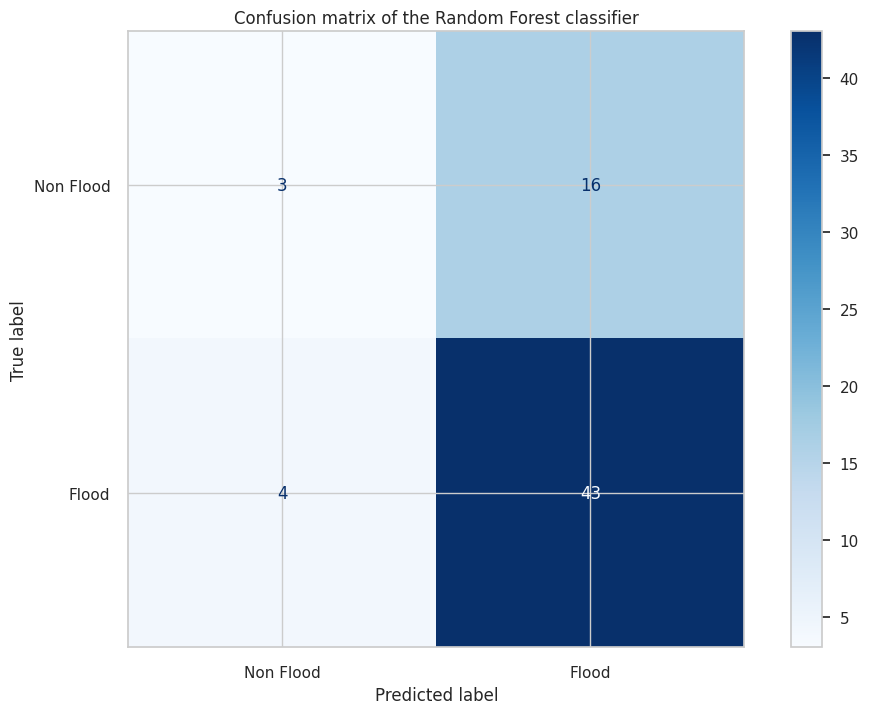

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf,
                                        cmap="Blues",
                                        display_labels=["Non Flood", "Flood"])

plt.title('Confusion matrix of the Random Forest classifier')
plt.show()

In [ ]:
print(accuracy_score(y_test, y_pred_rf))

0.696969696969697


In [ ]:
from sklearn.metrics import cohen_kappa_score

In [ ]:
print(cohen_kappa_score(y_test, y_pred_rf))

0.08965517241379306


In [ ]:
from sklearn import metrics
from sklearn.metrics import roc_curve

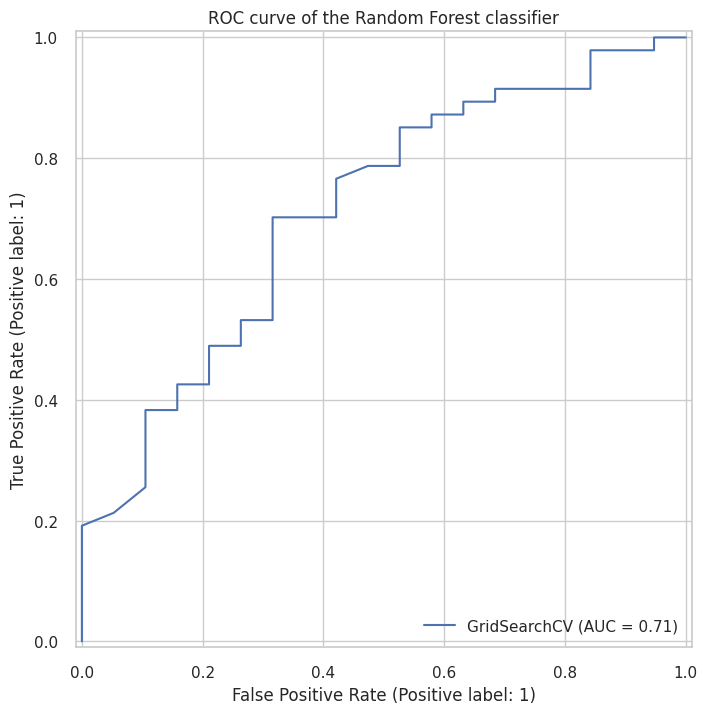

In [ ]:
from sklearn.metrics import RocCurveDisplay

# metrics.plot_roc_curve(model_rf, x_test, y_test) # deprecated
RocCurveDisplay.from_estimator(model_rf, x_test, y_test)
plt.title('ROC curve of the Random Forest classifier')
plt.show()

# TREE 200 RANDOM STATE 42

In [ ]:
model_rf = RandomForestClassifier(n_estimators=200, random_state=42)
model_rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [ ]:
y_pred_rf = model_rf.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred_rf, target_names = ['non_flood', 'flood']))

              precision    recall  f1-score   support

   non_flood       0.57      0.21      0.31        19
       flood       0.75      0.94      0.83        47

    accuracy                           0.73        66
   macro avg       0.66      0.57      0.57        66
weighted avg       0.70      0.73      0.68        66



In [ ]:
print(accuracy_score(y_test, y_pred_rf))

0.7272727272727273


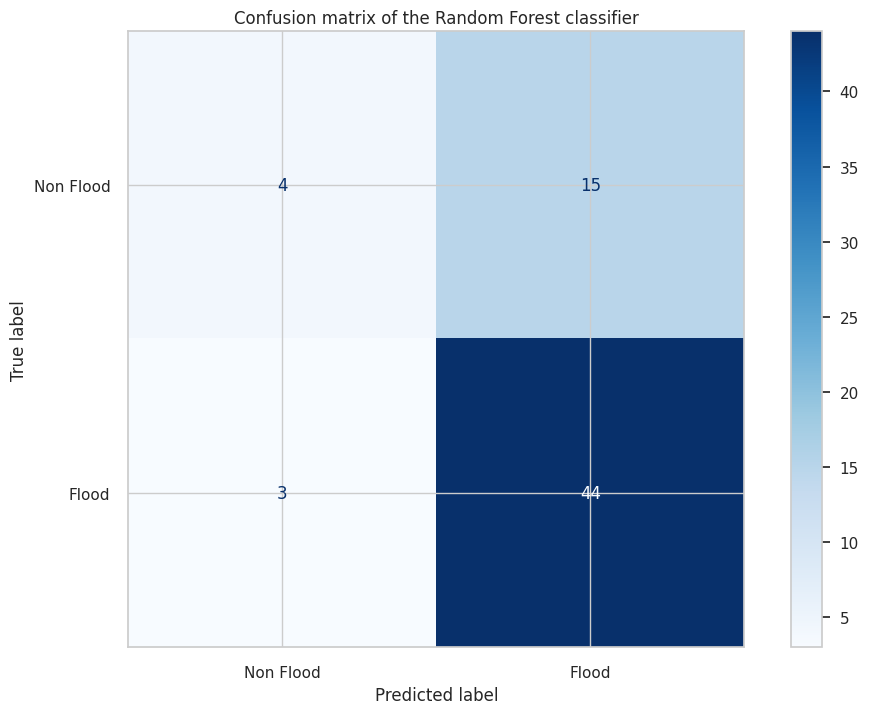

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf,
                                        cmap="Blues",
                                        display_labels=["Non Flood", "Flood"])

plt.title('Confusion matrix of the Random Forest classifier')
plt.show()

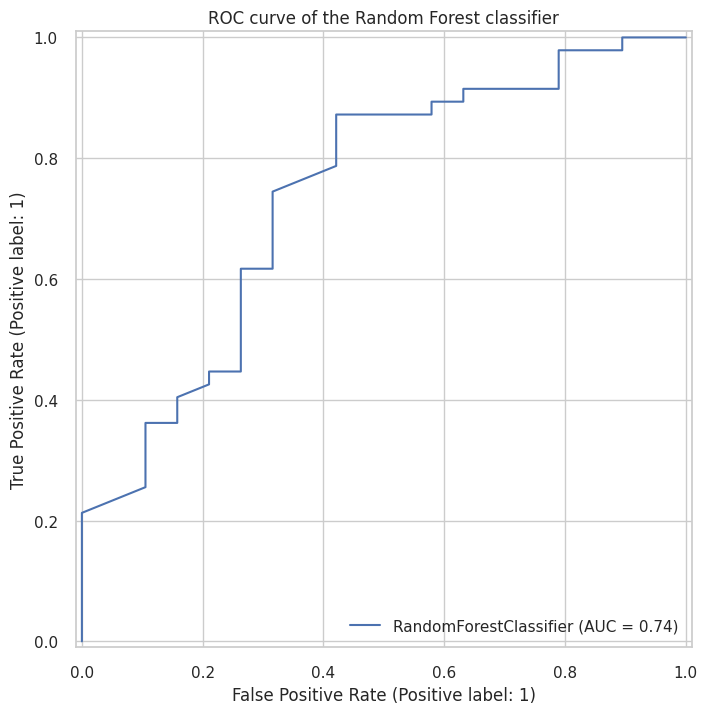

In [ ]:
# metrics.plot_roc_curve(model_rf, x_test, y_test) # deprecated
RocCurveDisplay.from_estimator(model_rf, x_test, y_test)
plt.title('ROC curve of the Random Forest classifier')
plt.show()

# Tree 150 random state 42

In [ ]:
model_rf = RandomForestClassifier(n_estimators=150, random_state=42)
model_rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=150, random_state=42)

In [ ]:
y_pred_rf = model_rf.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred_rf, target_names = ['non_flood', 'flood']))

              precision    recall  f1-score   support

   non_flood       0.56      0.26      0.36        19
       flood       0.75      0.91      0.83        47

    accuracy                           0.73        66
   macro avg       0.65      0.59      0.59        66
weighted avg       0.70      0.73      0.69        66



In [ ]:
print(accuracy_score(y_test, y_pred_rf))

0.7272727272727273


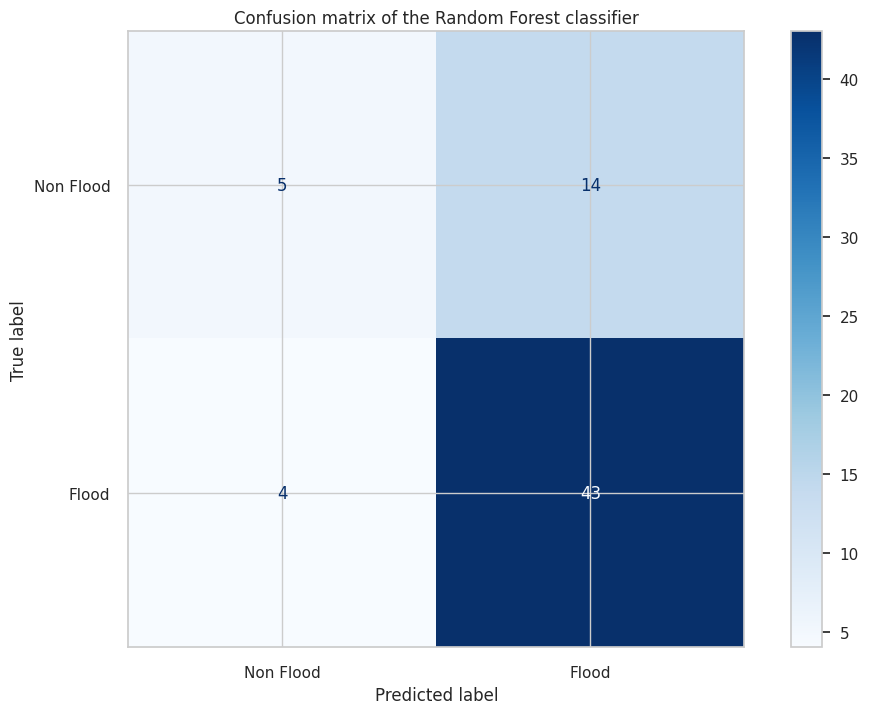

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf,
                                        cmap="Blues",
                                        display_labels=["Non Flood", "Flood"])

plt.title('Confusion matrix of the Random Forest classifier')
plt.show()

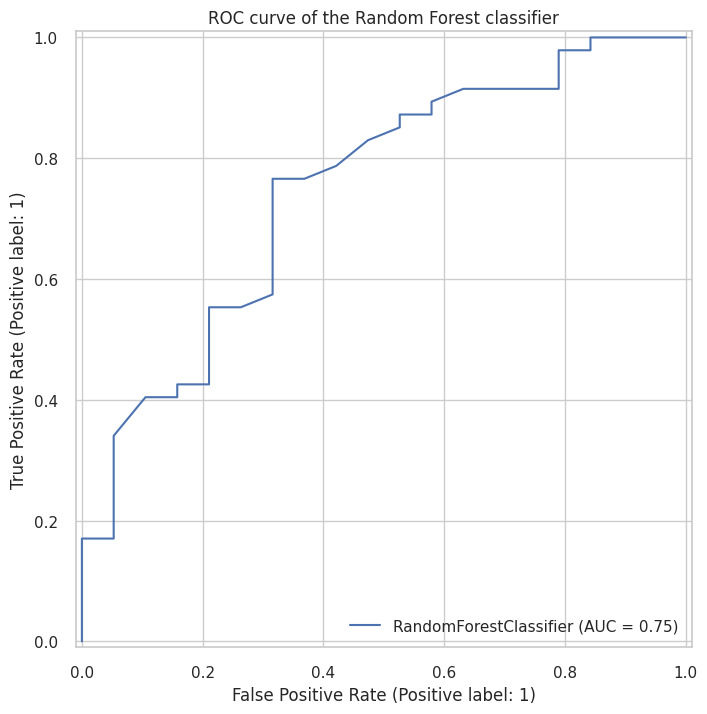

In [ ]:
# metrics.plot_roc_curve(model_rf, x_test, y_test) # deprecated
RocCurveDisplay.from_estimator(model_rf, x_test, y_test)
plt.title('ROC curve of the Random Forest classifier')
plt.show()

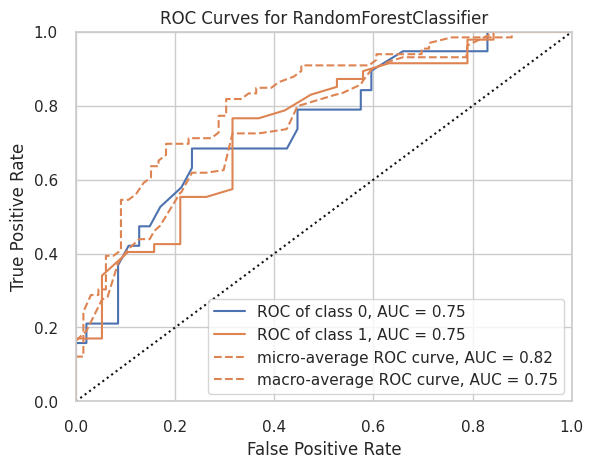

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
from yellowbrick.classifier import ROCAUC

plt.figure(figsize=(6.4, 4.8))
visualizer = ROCAUC(
    model_rf,
    is_fitted=True
)
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show()

# END OF THE DAY
##21 July 2025